# Churn Prediction

### Customer churn, is the percentage of customers who stop doing business with an entity

Every company wants to increase its revenue and profitability. To do that, while they acquire new customers, they also want to make sure that the existing ones stay with them for a long term. Also, its strategically important to know beforehand whether a set of customers are planning to stop using their services (especially recurring ones like internet, cable, phone etc.). To do that, every company or business creates and tracks customer metrics which are then used to predict their likelihood of churn.

Customer Churn for a company occurs when a customer decides to stop using the services of that company. In this project, we will be using the customer data of a telecom sector company based in the US to predict the probability of churn for each of the customer. We will look at the standard practices that are followed in the industry to solve these problems and also go beyond just those techniques. We have chosen the telecom company data for the churn problem as it is a major area of concern for companies in that sector.

Once we have built a model, the churn model output can also be used as a warning indicator that some customers are likely to churn. The key drivers that are making the customer more likely to churn can be alleviated and ensure that the customers are actually retained.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting the working directory
os.chdir('./data/')

In [3]:
#reading the required data files
train = pd.read_csv('Telecom_Train.csv')
test = pd.read_csv('Telecom_Test.csv')

### Exploratory Data Analysis (EDA)

#### Checking the train to test data ratio

In [5]:
train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [6]:
test.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [7]:
test.shape[0], train.shape[0]

(1667, 3333)

In [4]:
test.shape[0]/train.shape[0]

0.5001500150015001

In [8]:
train.dtypes.sort_values()

Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

#### Checking for missing values

In [9]:
train.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### Checking for unique values

In [10]:
train.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   119
total_night_calls                 120
total_eve_calls                   123
total_intl_charge                 162
total_intl_minutes                162
account_length                    212
total_night_charge                933
total_eve_charge                 1440
total_night_minutes              1591
total_eve_minutes                1611
total_day_minutes                1667
total_day_charge                 1667
Unnamed: 0                       3333
dtype: int64

In [11]:
#Creating a function that does all of the above tasks in one go
def get_basic_stats(dfname):
    print("Shape of dataframe is " + str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique().sort_values())
    print("Below are some records in DF")
    print("Below is distribution of numeric variables")
    print(dfname.describe())
    print(dfname.head())

In [13]:
get_basic_stats(train)

Shape of dataframe is (3333, 21)
Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object
Below are missing values in each column
Unnamed: 0     

#### Data Cleaning

In [14]:
#Removing the junk column
train = train.drop(['Unnamed: 0'], axis =1 )
test = test.drop(['Unnamed: 0'], axis = 1)

#creating a copy to keep the original dataframes intact
train2 = train.copy()
test2 = test.copy()

In [16]:
#creating binary variables from categorical variables that take just 2 unique values
yes_no_vars = ['churn', 'international_plan', 'voice_mail_plan']

def cat_to_binary(df, varname):
    df[varname + '_num'] = df[varname].apply(lambda x : 1 if x == 'yes' else 0)
    print("checking")
    print(df.groupby([varname + '_num', varname]).size())
    return df


for varname in yes_no_vars:
    train2 = cat_to_binary(train2, varname)
    test2 = cat_to_binary(test2, varname)

checking
churn_num  churn
0          no       2850
1          yes       483
dtype: int64
checking
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
checking
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64
checking
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
checking
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64
checking
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


#### Checking if the function has worked

In [26]:
num_vars = ['churn_num', 'international_plan_num', 'voice_mail_plan_num']
for i in num_vars:
    print(i + str(set(train2[i])))
    print("++++++++++++")
    print(i + str(set(test2[i])))

churn_num{0, 1}
++++++++++++
churn_num{0, 1}
international_plan_num{0, 1}
++++++++++++
international_plan_num{0, 1}
voice_mail_plan_num{0, 1}
++++++++++++
voice_mail_plan_num{0, 1}


It did!!

### Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

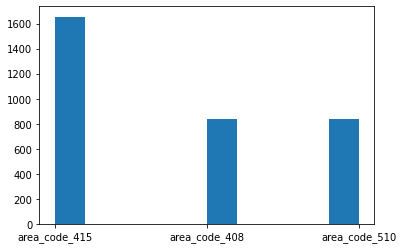

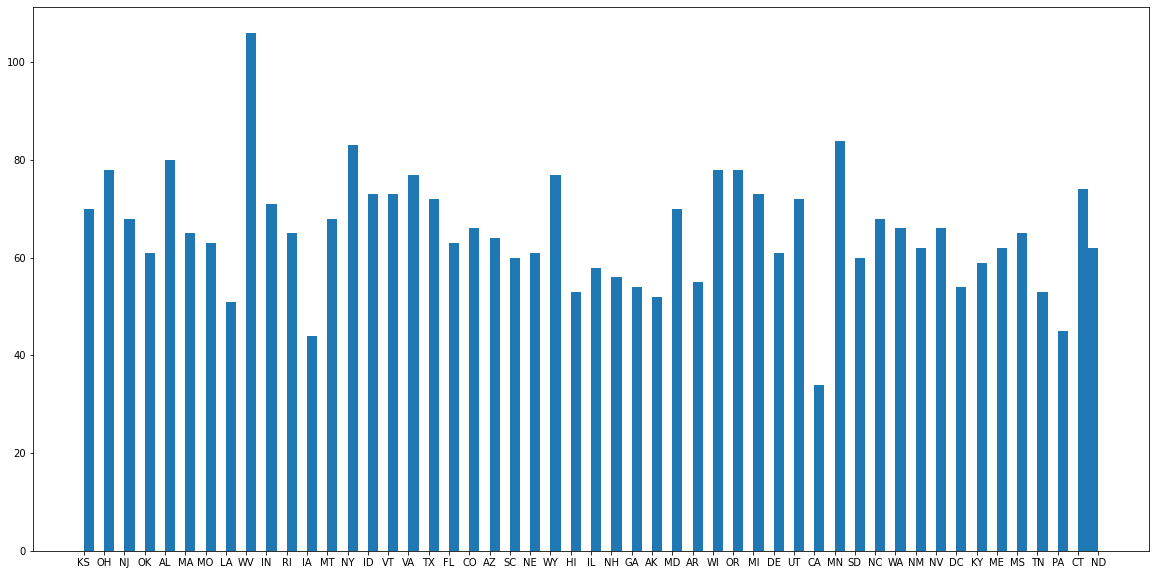

In [28]:
#univariate analysis of categorical variables

plt.hist(list(train2['area_code']))
plt.show
plt.figure(figsize = (20,10))
plt.hist(list(train2['state']), bins = 100)
plt.show

In [29]:
#this is sufficient for univariate analysis of binary variables

train2.mean()

<ipython-input-29-5ffc77b3c6da>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train2.mean()


account_length                   101.064806
number_vmail_messages              8.099010
total_day_minutes                179.775098
total_day_calls                  100.435644
total_day_charge                  30.562307
total_eve_minutes                200.980348
total_eve_calls                  100.114311
total_eve_charge                  17.083540
total_night_minutes              200.872037
total_night_calls                100.107711
total_night_charge                 9.039325
total_intl_minutes                10.237294
total_intl_calls                   4.479448
total_intl_charge                  2.764581
number_customer_service_calls      1.562856
churn_num                          0.144914
international_plan_num             0.096910
voice_mail_plan_num                0.276628
dtype: float64

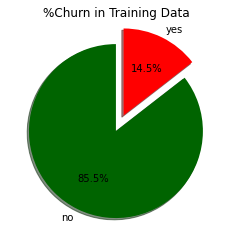

In [31]:
# Visualizing the churn variable

topie = train2['churn'].value_counts(sort = True)
colorss = ["darkgreen","red"] 
plt.pie(topie,labels = topie.index.values, explode= [0, 0.2],  colors=colorss, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('%Churn in Training Data')
plt.show()

In [33]:
#creating a list of continuous variables, which would be visualized using boxplot

continuous_vars = train.select_dtypes([np.number]).columns.tolist()
print(continuous_vars)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


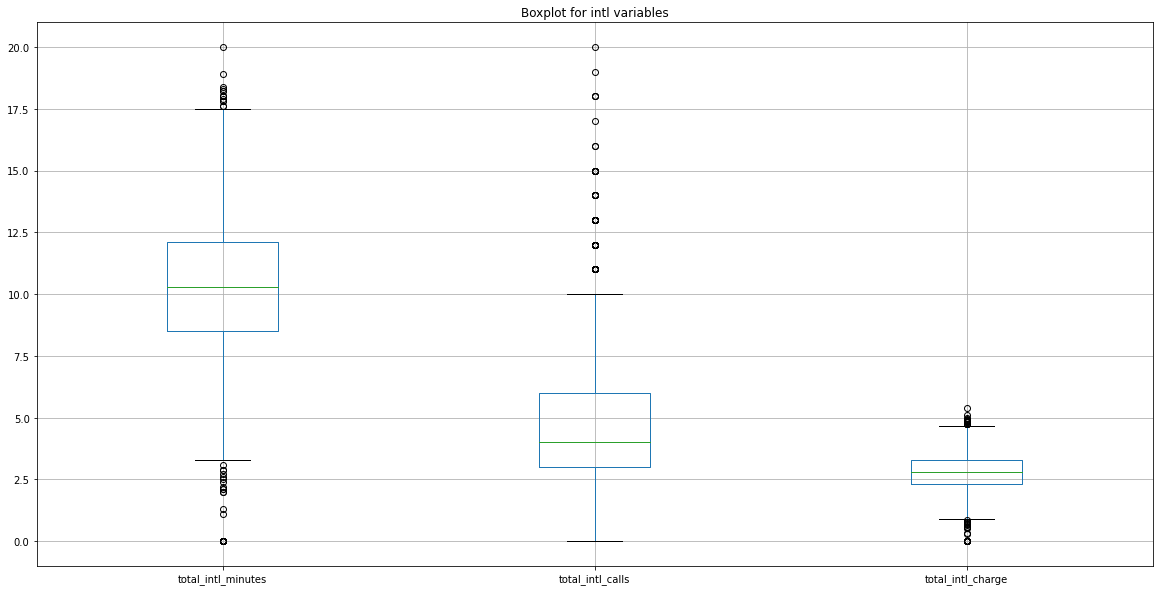

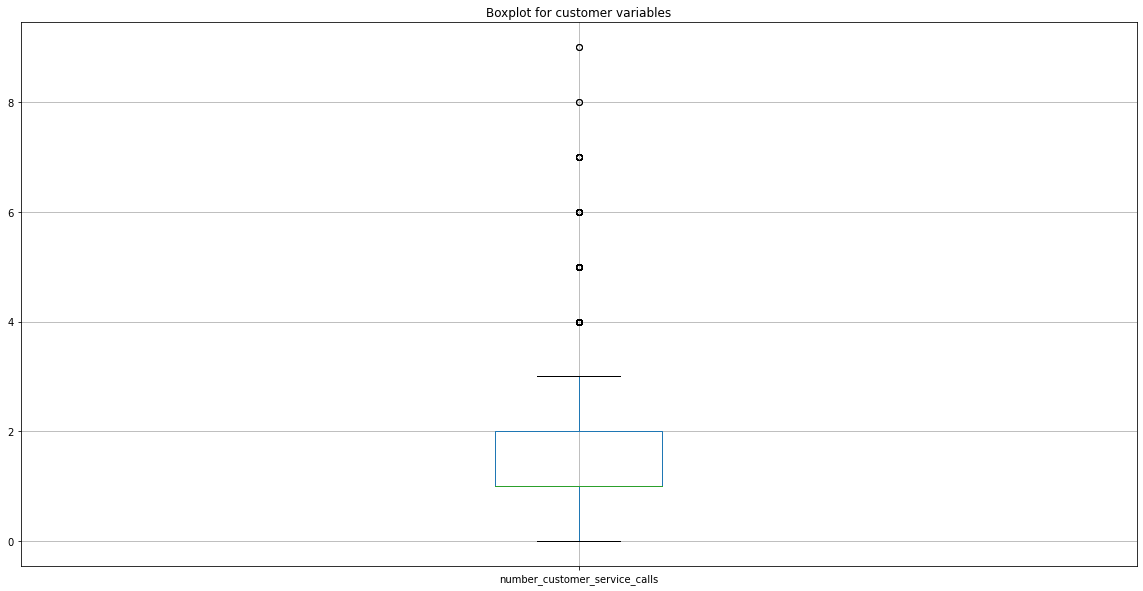

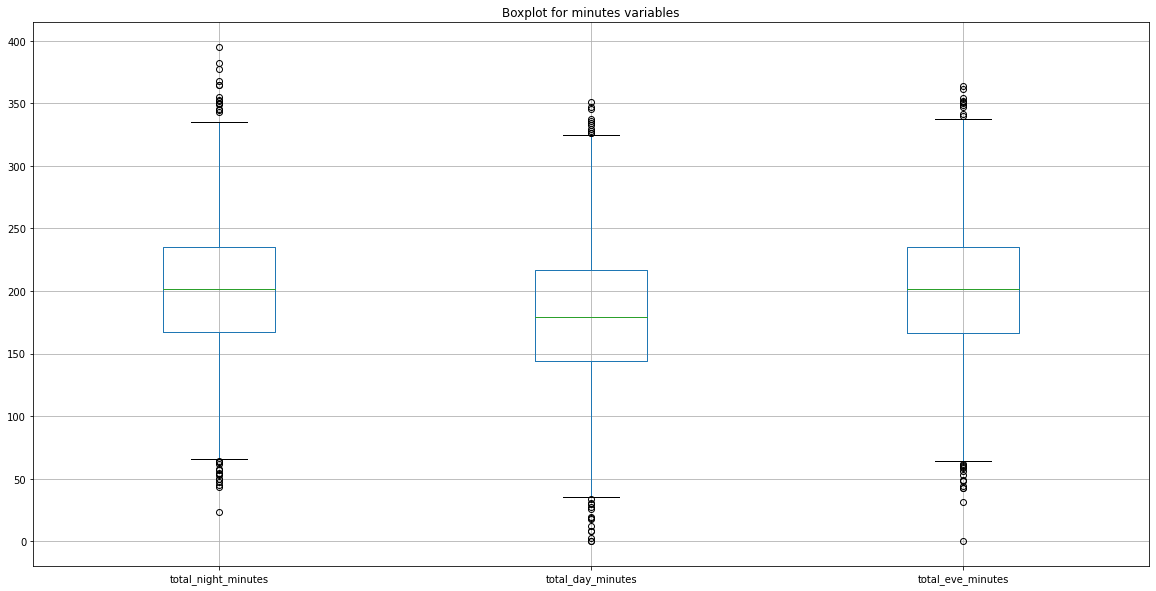

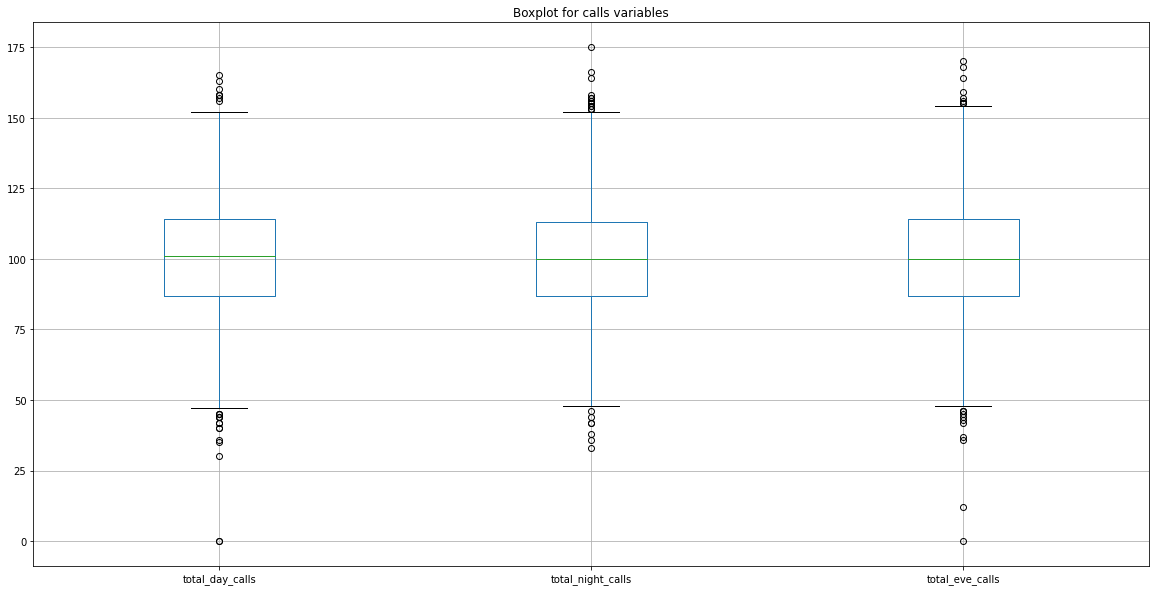

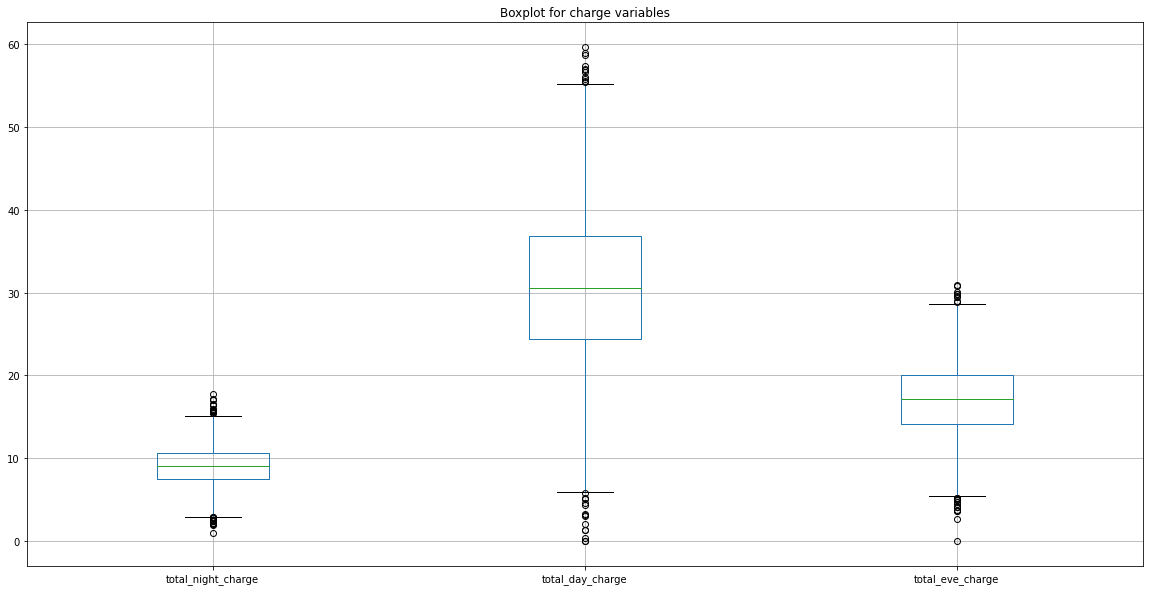

In [34]:
#univariate analysis of continuous variables
type_of_vars = ['intl', 'customer', 'minutes', 'calls', 'charge']
remaining_list = train2.columns
for vartype in type_of_vars:
    temp_list = [x for x in remaining_list if vartype in x]
    remaining_list = list(set(remaining_list).difference(set(temp_list)))
    train2.boxplot(column=temp_list, figsize = (20,10) )
    plt.title('Boxplot for '+ vartype + ' variables')
    plt.show()

### Bi-variate Analysis

In [36]:
X = train2.drop('churn_num', axis=1)

In [43]:
all_corr = X.corr().unstack().reset_index()
corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table.head(10)
#total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, voice_mail_plan_num
#these 5 variables can be dropped

<ipython-input-43-5726efc92faa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_table['corr_abs'] = corr_table['corr_value'].abs()


,var1,var2,corr_value,corr_abs
38,total_day_minutes,total_day_charge,1.000000,1.000000
92,total_eve_minutes,total_eve_charge,1.000000,1.000000
146,total_night_minutes,total_night_charge,0.999999,0.999999
200,total_intl_minutes,total_intl_charge,0.999993,0.999993
273,voice_mail_plan_num,number_vmail_messages,0.956927,0.956927
83,total_day_charge,international_plan_num,0.049398,0.049398
49,total_day_minutes,international_plan_num,0.049396,0.049396
202,total_intl_minutes,international_plan_num,0.045871,0.045871
236,total_intl_charge,international_plan_num,0.045780,0.045780
51,total_day_calls,account_length,0.038470,0.038470


Interestingly<br>
**total_day_minutes	total_day_charge**<br>
**total_eve_minutes	total_eve_charge**<br>
**total_night_minutes	total_night_charge**<br>
**total_intl_minutes	total_intl_charge**<br>